In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso

In [7]:
data = pd.read_csv('Data_Q2',index_col=0)
data

,x,y
0,1.624345,-1.209235
1,-0.611756,2.394638
2,-0.528172,2.528607
3,-1.072969,-5.347027
4,0.865408,4.262015
...,...,...
95,0.077340,4.646311
96,-0.343854,4.493099
97,0.043597,6.583315
98,-0.620001,1.881545


In [9]:
x = data['x']
y = data['y']

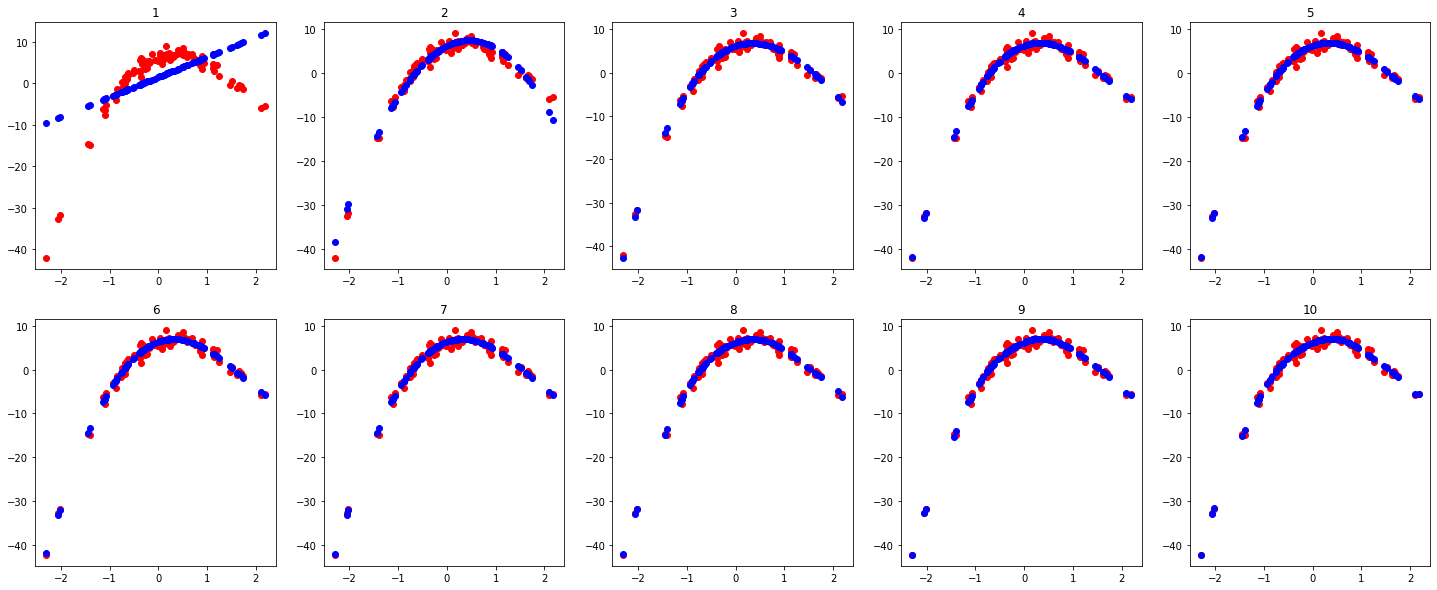

In [10]:
bic_vec = np.zeros((10,1))
aic_vec = np.zeros((10,1))
plt.figure(figsize=(25,10))
for i in range(10):
    p = i+1
    x_vec = np.polynomial.polynomial.polyvander(x,p)
    model = sm.OLS(y,x_vec).fit()
    if i==0:
        bic_min = model.bic
    elif model.bic < bic_min:
        bic_min = model.bic
        best_bic_params = model.params
    if i==0:
        aic_min = model.aic
    elif model.aic < aic_min:
        aic_min = model.aic
        best_aic_params = model.params
    bic_vec[i]=model.bic
    aic_vec[i]=model.aic
    plt.subplot(2,5,p)
    y_predict = model.fittedvalues
    plt.scatter(x,y,c='r')
    plt.scatter(x,y_predict,c='b')
    plt.title(str(p))
    

In [11]:
bic_aic_df = pd.DataFrame(np.concatenate((bic_vec,aic_vec),axis =1 ),columns = ['bic value','aic value'], index = np.linspace(1,10,10))

In [12]:
bic_aic_df

,bic value,aic value
1.0,677.598182,672.387842
2.0,357.330237,349.514726
3.0,285.734557,275.313877
4.0,284.276388,271.250537
5.0,288.881554,273.250533
6.0,293.410946,275.174754
7.0,298.012627,277.171265
8.0,300.985570,277.539038
9.0,303.509673,277.457971
10.0,307.654182,278.997310


In [13]:
best_bic_params

const    6.313982
x1       3.912735
x2      -6.544477
x3       0.699182
x4       0.139361
dtype: float64

In [14]:
best_aic_params

const    6.313982
x1       3.912735
x2      -6.544477
x3       0.699182
x4       0.139361
dtype: float64

<Figure size 432x288 with 0 Axes>

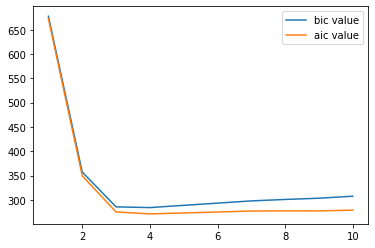

In [15]:
plt.figure()
bic_aic_df.plot()
plt.show()

## part(e)

In [16]:
def ridge_lasso_reg2 (lambda_vec,option = 'ridge',params = False):
    
    kf = KFold(n_splits = 10)
    err = np.zeros(len(lambda_vec))
    X = np.polynomial.polynomial.polyvander(x,10)
    y = data['y']
    coefficients = np.zeros((len(lambda_vec),11))
#     err1_vec = np.zeros(10)
    err2_vec = np.zeros(10)

    #carry out a binary search to find the optimal lambda
    for i in range(len(lambda_vec)):
        fold = 0
        if option == 'ridge':
            reg = Ridge(alpha = lambda_vec[i],fit_intercept = False)
        elif option == 'lasso':
            reg = Lasso(alpha = lambda_vec[i],fit_intercept = False,tol=0.01,max_iter = 10000)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index],X[test_index]
            y_train, y_test = y[train_index],y[test_index]

#             if i==0:
#                 ridreg1 = f(alpha = lambda_vec[0],fit_intercept = False, normalize=True)
#                 model1 = ridreg1.fit(X_train,y_train)
#                 y_pred_1 = model1.predict(X_test)
#                 err1_vec[fold] = np.mean((y_pred_1-y_test)**2)

          #  reg = f
            model = reg.fit(X_train,y_train)
            y_pred_2 = model.predict(X_test)
            err2_vec[fold] = np.mean((y_pred_2-y_test)**2)
            fold += 1

#         if i==0:
#             err1 = np.mean(err1_vec)
#             err.append(err1)
 #       print(err2_vec)
        err2 = np.mean(err2_vec)
        err[i]=err2
        coefficients[i,:] = model.coef_

#         if i!=(n-1):
#             lambda_storage_vec.append(np.mean(lambda_vec))

#         if err1 > err2:
#             lambda_vec = [lambda_vec[1],np.mean(lambda_vec)]
#             err1 = err2
#         else:
#             lambda_vec = [lambda_vec[0],np.mean(lambda_vec)]
        
    if params:
        return err, coefficients
    else:
        return err

In [17]:
l1 = np.linspace(0,2,41)
ridge_err_2 = ridge_lasso_reg2(l1)
ridge_err_2

array([2.76115474, 3.05096039, 3.1041114 , 3.02655863, 2.88962884,
       2.73078843, 2.56947497, 2.41565579, 2.2741894 , 2.14711332,
       2.03489071, 1.93711259, 1.85290372, 1.78116113, 1.72069534,
       1.67031355, 1.6288677 , 1.59528087, 1.56856026, 1.54780208,
       1.53219122, 1.5209981 , 1.51357368, 1.50934374, 1.50780274,
       1.50850767, 1.51107219, 1.51516098, 1.52048452, 1.5267943 ,
       1.53387835, 1.54155725, 1.5496805 , 1.55812321, 1.56678314,
       1.57557807, 1.58444339, 1.59332995, 1.60220221, 1.61103646,
       1.61981935])

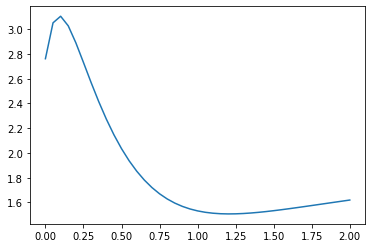

In [18]:
plt.plot(l1,ridge_err_2)

we pick lambda = 1.2

In [22]:
l2 = np.linspace(0,0.2,21) #no matter how I change this interval, it always suggests that lambda = 0 gives the samllest value, I have also altered the tol and max_iter a lot to make it converge, but no effect
lasso_err_2,lasso_params_2 = ridge_lasso_reg2(l2,option='lasso',params=True)
lasso_err_2

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are

array([ 0.93712915,  0.98974645,  1.87466238,  3.79763414,  4.31165054,
        4.72633177,  5.15139012,  5.59376147,  6.05532773,  6.48937656,
        6.99306678,  7.53412523,  8.14033929,  8.78599176,  9.47866918,
       10.23401447, 11.08399508, 12.06880469, 13.26868876, 14.27880193,
       15.19249394])

In [23]:
lasso_params_2

array([[ 6.02578958e+00,  3.99587237e+00, -5.94340822e+00,
         5.81034046e-01, -5.75622912e-02,  1.16659762e-02,
         8.37006692e-03,  1.30737347e-03,  1.22853896e-03,
         1.93059879e-04,  1.57053426e-04],
       [ 5.99479394e+00,  3.96747478e+00, -5.89318952e+00,
         5.85838642e-01, -6.68623683e-02,  1.21527270e-02,
         7.96396237e-03,  1.25206237e-03,  1.28194942e-03,
         1.90276926e-04,  1.64508548e-04],
       [ 5.96379830e+00,  3.93907719e+00, -5.84297081e+00,
         5.90643237e-01, -7.61624455e-02,  1.26394778e-02,
         7.55785782e-03,  1.19675127e-03,  1.33535988e-03,
         1.87493973e-04,  1.71963670e-04],
       [ 5.93280266e+00,  3.91067959e+00, -5.79275211e+00,
         5.95447833e-01, -8.54625226e-02,  1.31262287e-02,
         7.15175327e-03,  1.14144016e-03,  1.38877034e-03,
         1.84711020e-04,  1.79418792e-04],
       [ 5.92556842e+00,  3.88727699e+00, -5.77964731e+00,
         6.01223608e-01, -9.15185384e-02,  1.36135924e-02,
  

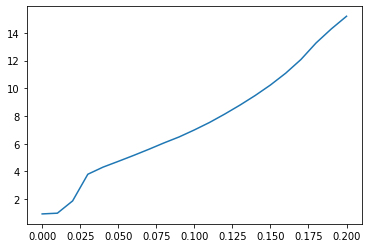

In [24]:
plt.plot(l2,lasso_err_2)

In [28]:
X = np.polynomial.polynomial.polyvander(x,10)

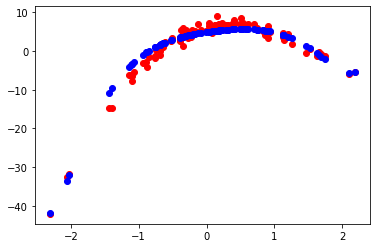

In [31]:
reg = Lasso(alpha =0.5,tol=0.01)
model_lasso = reg.fit(X,y)
y_pred_lasso = model_lasso.predict(X)
plt.scatter(x,y,c='r')
plt.scatter(x,y_pred_lasso,c='b')

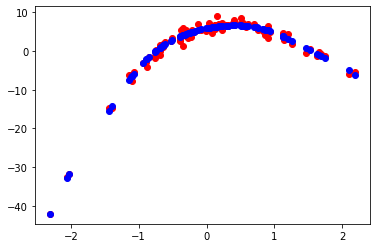

In [32]:
X = np.polynomial.polynomial.polyvander(x,10)
reg = Ridge(alpha =1.20)
model_ridge = reg.fit(X,y)
y_pred_ridge = model_ridge.predict(X)
plt.scatter(x,y,c='r')
plt.scatter(x,y_pred_ridge,c='b')